In [1]:
!pip install stable-baselines3[extra]
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 4.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 24.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 41.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 25.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.2 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=c2aeb53c755767224a1de512fc3622edf1c0d11effced14e5732216f7b6d6b76
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
  Attempting uninstall: gymnasium
    Found existing installation: Gymnasium 0.26.3
    Uninstalli

In [2]:
import os
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common import env_checker
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3 import DQN
import gymnasium as gym

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [5]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):

        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, f'best_model_{self.n_calls}')
            self.model.save(model_path)
        return True

In [3]:

CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'
window = 4
env = make_atari_env("ALE/Breakout-v5", n_envs=1, monitor_dir=LOG_DIR)
# Frame-stacking with 4 frames
vec_env = VecFrameStack(env, n_stack=window)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [6]:
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)
newmodel = DQN('CnnPolicy', vec_env, tensorboard_log=LOG_DIR, verbose=1,
            buffer_size=50000, batch_size=64, learning_starts=10000, gamma=0.95,
            exploration_fraction = 0.5, exploration_final_eps=0.1)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
newmodel.learn(total_timesteps=1000000, callback=callback, log_interval=1000)

In [8]:
model = DQN.load("/kaggle/working/best_model_1000000.zip", print_system_info=True)
window = 4

== CURRENT SYSTEM INFO ==
- OS: Linux-5.15.109+-x86_64-with-glibc2.31 # 1 SMP Tue Jun 27 10:54:51 UTC 2023
- Python: 3.10.10
- Stable-Baselines3: 2.0.0
- PyTorch: 2.0.0+cpu
- GPU Enabled: False
- Numpy: 1.23.5
- Cloudpickle: 2.2.1
- Gymnasium: 0.28.1
- OpenAI Gym: 0.26.2

== SAVED MODEL SYSTEM INFO ==
- OS: Linux-5.15.109+-x86_64-with-glibc2.35 # 1 SMP Sat Jun 24 10:55:41 UTC 2023
- Python: 3.10.10
- Stable-Baselines3: 2.0.0
- PyTorch: 2.0.0
- GPU Enabled: True
- Numpy: 1.23.5
- Cloudpickle: 2.2.1
- Gymnasium: 0.28.1
- OpenAI Gym: 0.26.2



In [16]:
import imageio
import numpy as np

env = make_atari_env("ALE/Breakout-v5", n_envs=1)
window=4
# Frame-stacking with 4 frames
vec_env = VecFrameStack(env, n_stack=window)
model.set_env(vec_env)
imgs = []
episodes = 1
for episode in range(1, episodes+1):
    obs = vec_env.reset()

    score = 0

    while True:
        action, _states = model.predict(obs, deterministic=False)
        obs, rewards, dones, info = vec_env.step(action)
#         print(info[0]['lives'])
        score += rewards[0]
        vec_env.render("rgb_array")
        imgs.append(model.env.render(mode='rgb_array'))
        if info[0]['lives'] == 0 and dones[0]:
            break
        
    print('Episode:{} Score:{}'.format(episode, score))
vec_env.close()
del vec_env

imageio.mimsave('breakout.gif', [np.array(img) for i, img in enumerate(imgs)])

Wrapping the env in a VecTransposeImage.
Episode:1 Score:25.0


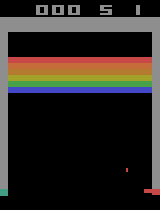

In [23]:
from IPython.display import Image, display
display(Image(data=open('/kaggle/working/breakout.gif','rb').read(), format='gif'))

In [21]:
env = make_atari_env("ALE/Breakout-v5", n_envs=1)
window=4
# Frame-stacking with 4 frames
vec_env = VecFrameStack(env, n_stack=window)
rew_mean, rew_std = evaluate_policy(model, vec_env, n_eval_episodes=100, render=True)

In [22]:
rew_mean, rew_std

(29.92, 10.028638990411412)